DATA SCIENCE 241 PROJECT  
by:   
    Thina Mbangela [24930741]  
    Mardelle Steyn [24711829]  
    Lara Neizel    [24786845]  

# Import Data and Necessary Libraries

In [1]:
#import some libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import matplotlib.ticker as ticker
from scipy.stats import spearmanr
from sklearn.model_selection import train_test_split
from scipy import stats

In [2]:
#read in the data 
df = pd.read_csv(filepath_or_buffer = 'SalesDirect.csv')

In [3]:
#make sure the data is correct 
print("shape of the data: ", df.shape)
df.isna().sum()

shape of the data:  (150000, 22)


Sales                  0
Purchase               0
Month                  0
AgeInMonths            0
ProfileInMonths        0
Subscribed             0
NumPrevOrders          0
AvgSpend               0
POSR                   0
OPR                    0
Online                 0
Discount           58536
ShippingOption     58536
Shipping           58536
Country                0
Platform               0
Payment            58536
DayOfWeek              0
Ad_1                   0
Ad_2                   0
Ad_3                   0
SocialMedia            0
dtype: int64

# Background 

Sales Direct is a online fashion store. The company has mainly South African clients, but recently started engaging with
international customers.

We will create a model, using supervised regression analysis, that will predict the amount a client spends when making a purchase, based on numerous variables. The model will be made under the assumption that the client will make a purchase. 
We are assuming the data collected was done randomly and independently. 

Once we have our models, we will choose the model that performs best. By looking at the variables that have the greatest influence on the model, we are able to give the company advice for the future to help increase thier sales.

 # Exploratory Data Anaylsis
## Handling Missing Values 

In [4]:
#handling missing values in Discount, ShippingOption, Shipping, Payment 
#drop row if sales is zero
df.drop(df.loc[df['Sales'] == 0].index, inplace = True)
#drop purchase - no significant effect always yes
print(df['Purchase'].value_counts())
df.drop(['Purchase'], axis=1, inplace= True)
#check that there is no missing values in new data set 
print(df.isna().sum())
df.shape

Yes    91464
Name: Purchase, dtype: int64
Sales              0
Month              0
AgeInMonths        0
ProfileInMonths    0
Subscribed         0
NumPrevOrders      0
AvgSpend           0
POSR               0
OPR                0
Online             0
Discount           0
ShippingOption     0
Shipping           0
Country            0
Platform           0
Payment            0
DayOfWeek          0
Ad_1               0
Ad_2               0
Ad_3               0
SocialMedia        0
dtype: int64


(91464, 21)

All rows with sales equal to zero were removed, as it corresponds to a client that didn't make a purchase. This assumption won't affect our model. After removing these rows, all the missing values were taken care of.  

## Numerical and Visual Exploration

Change the variable Months to Seasons. Seeing as this is a clothing shop it would be best suited to work in seasons because the different seasons have different suitability of clothes due to the chnages in weather and the shop will change their stock accordingly.

We decided to change the country variable to continents. With reference to Figure A1 (in Appendix 1), we would like to know in which continent the company is most popular. If we were to look at the data per country, we would not be able to see in which countries the business is most popular in (other than South Africa). Whereas, when we change it to continenets, it is clear to see where the company is most popular.
Doing the change from countries to continents also helps with the curse of dimentionality as we went from a level 14 variable to a level 4 variable.

In [5]:
#Changing Months & Country variables
df_new = df.copy()
#changing Month to Season
season_dict = {'January': 'Summer',
               'February': 'Summer',
               'March': 'Autumn', 
               'April': 'Autumn',
               'May': 'Autumn',
               'June': 'Winter',
               'July': 'Winter',
               'August': 'Winter',
               'September': 'Spring',
               'October': 'Spring',
               'November': 'Spring',
               'December': 'Summer'}
#add Season column
df_new['Season'] = df_new['Month'].apply(lambda x: season_dict[x])

#changing Country to Continent
con_dict = {'South Africa': 'Africa',
            'England': 'Europe',
            'Japan': 'Asia', 
            'China': 'Asia',
            'Belgium': 'Europe',
            'Ireland': 'Europe',
            'Egypt': 'Africa',
            'India': 'Asia',
            'Germany': 'Europe',
            'Netherlands': 'Europe',
            'Kenya': 'Africa',
            'United States': 'North-America',
            'Brazil' : 'South-America',
            'Italy' : 'Europe'}
#add Continent column
df_new['Continent'] = df_new['Country'].apply(lambda y: con_dict[y])

df = df_new.copy()
df_new.drop(['Month'], axis=1, inplace= True)
df_new.drop(['Country'], axis=1, inplace= True)

### Correlation 

The correlation will be done using 2 methods. We use Pearson Correlation when both variables are numerical and Chi-square Correlation when when both variables are categorical.

We will not look at Numerical vs categorical variables, since this is out of the scope of our knowlage. 

We looked at the correlation between the variables to do our feature selection for the multiple regression model. If two variables have a high correlation, we remove the dependent variable, to prevent multicollineartity problems in the model. 

#### Numeric vs Numeric Data



<AxesSubplot:>

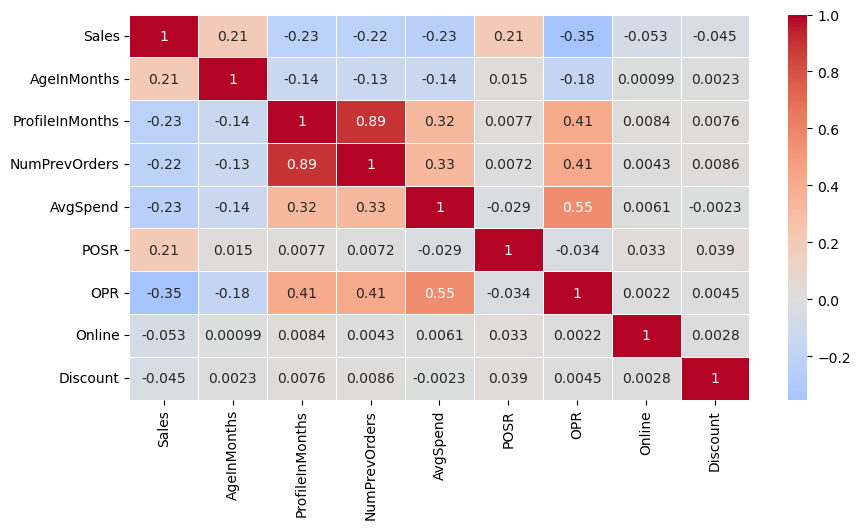

In [6]:
#heatmap for the correlation of numeric variables
plt.figure(figsize = (10,5))
#illustrates predictors with interaction due to high correlation between them
sns.heatmap(df.corr(),annot = True, cmap='coolwarm', linewidths=.5, center = 0)

ProfileInMonths and NumPrevOrders have a high correlation (0,89). The interaction between them is due to the fact that before a client can make a purchase they need to create a profile. This indicates that the profile in months is dependent on the number of previous orders. Profile in months can be misleading, as a client doesn't necessarily make a sale in each month that they have a profile. Thus, the independent variable, ProfileInMonths, will be excluded from the building of the model. 

#### Categorical vs Categorical Data

In [7]:
# uses the p-value to determine interaction between two variables

def drop_maybe(cols, col):
    for u in cols:
        crosstab = pd.crosstab(df[u], df[col])
        if (stats.chi2_contingency(crosstab)[1] < 0.05) and (col!= u):
            print(u +" interaction "+ col)
            
            
categorical_column = ['Subscribed', 'ShippingOption', 'Continent', 'Shipping',
                      'Platform', 'Payment', 'DayOfWeek', 'Ad_1', 'Ad_2',
                      'Ad_3', 'SocialMedia', 'Season']
i = 0
for u in categorical_column:
    drop_maybe(categorical_column[i:], u)
    i += 1
    print("---------------------------------------")
# https://pythonfordatascienceorg.wordpress.com/chi-square-python/

Ad_1 interaction Subscribed
Ad_2 interaction Subscribed
Ad_3 interaction Subscribed
SocialMedia interaction Subscribed
---------------------------------------
Continent interaction ShippingOption
Shipping interaction ShippingOption
Ad_2 interaction ShippingOption
Ad_3 interaction ShippingOption
---------------------------------------
Shipping interaction Continent
---------------------------------------
---------------------------------------
Payment interaction Platform
---------------------------------------
---------------------------------------
---------------------------------------
Ad_2 interaction Ad_1
Ad_3 interaction Ad_1
SocialMedia interaction Ad_1
---------------------------------------
Ad_3 interaction Ad_2
SocialMedia interaction Ad_2
Season interaction Ad_2
---------------------------------------
SocialMedia interaction Ad_3
---------------------------------------
---------------------------------------
---------------------------------------


We can see Ad_1, Ad_2 and Ad_3 have correlation with many of the other variables. It is interesting to see that the socialMedia is correlated with Ad_2 and Ad_3 as well, because we all ready know that socialMedia will have an effect on Ad_1. 

Refer to Set 3 (Appendix B) for the explanation of why certain variables were excluded from the variable.
This led us to the decision of removing ShippingOption, Platform, Ad_1, Ad_2, Ad_3, SocialMedia and Shipping from our model.

In [8]:
#create the categorical dummie variables for the regression model
df_reg = df_new.copy()
categorical_col_updated = ['Continent','Payment',
                           'DayOfWeek', 'Season', 'Subscribed'] 
df_reg = pd.get_dummies(df_new, columns = categorical_col_updated) 
# drop unnecessary Columns
df_reg = df_reg.drop(columns = ['Continent_South-America',
                               'DayOfWeek_Sunday', 'Subscribed_None',
                                 'Payment_PayPal', 'Season_Spring'])
#0 - False, 1 - True
#remove the variables that remove for both knn and regression 

### Univariate & Bivariate Analysis

#### Sales - Target Variable  

C:\Users\marth\anaconda3\envs\DS241_p39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


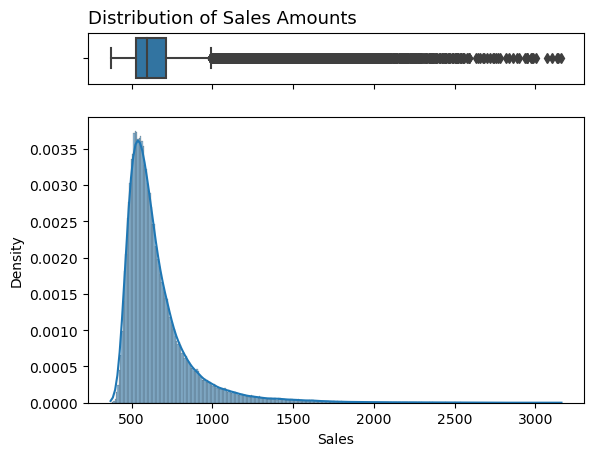

In [9]:
#Sales
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df['Sales'], ax = ax_box)

plt.title('Distribution of Sales Amounts', y=1.3, fontsize = 13, loc = 'left')
sns.histplot(x = df['Sales'], stat = 'density', kde=True, ax=ax_hist)
# Remove x axis name for the boxplot
ax_box.set(xlabel = '')
plt.show()

The Sales distribution is skewed right, with the outliers included. These outliers are natural variations in the population, since it is normal for more well off people to spend a lot more money on a sale and buy more expensive items. 

Referring to Appendix C, code C1:
The maximum amount of sales can be explained by certain customers spending more due to buying more than one item.   
The median amount is R597.67, which is considered a normal amount to spend as it is in line with the mean. 

#### Predictors Used For Both Regression and KNN Model 

C:\Users\marth\anaconda3\envs\DS241_p39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


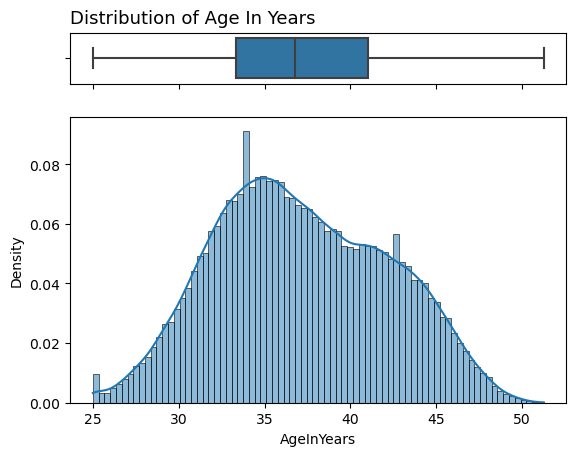

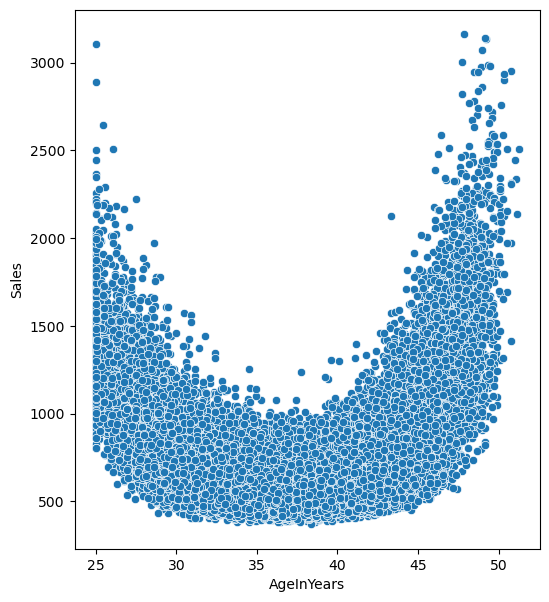

In [10]:
#AgeInYears
df['AgeInYears'] = df['AgeInMonths'] / 12
df.drop(['AgeInMonths'], axis=1, inplace= True) 

#https://www.python-graph-gallery.com/24-histogram-with-a-boxplot-on-top-seaborn
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(df['AgeInYears'], ax = ax_box)

plt.title('Distribution of Age In Years', y=1.3, fontsize = 13, loc = 'left')

sns.histplot(x = df['AgeInYears'], stat = 'density', kde=True, ax=ax_hist)
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

fig, ax = plt.subplots(figsize = (6, 7))
#vs Sales
sns.scatterplot(y = 'Sales', x = 'AgeInYears', data = df, ax = ax)

plt.show()

The AgeInYears distribution indicate a mostly normal distribution. This suggest that there is a specific age group who buys more from the company. This gives us the opportunity to know what our target market is or how to change our product to accomodate the other age groups too.  

Referring to Appendix C, Code c1:
The maximum and minumin of age in months also makes sense. It shows that our youngest age is 25 years old and oldest is 51 years old. This interval indicates that the people who buys from the store are people who are in the middle of the working age population (Appendix B, Set 2). The mean age group is 37 years old which indicates our current target market.    
When comparing Sales and AgeInYears one can see that there is a non-linear relationship between them. The plot indicates the people who spend more are at both ends of the AgeInYears distribution. This shows that the age group that buys the most from the company tends to spend less than the other age groups. We can advise the company to shitf the focus to the age groups one either end, so that we can profit more off them in the future.  

C:\Users\marth\anaconda3\envs\DS241_p39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


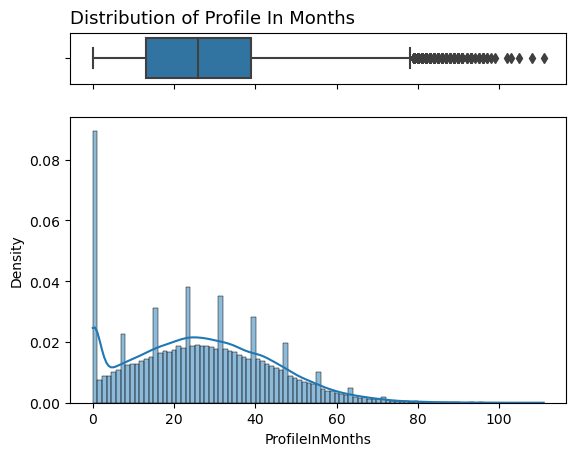

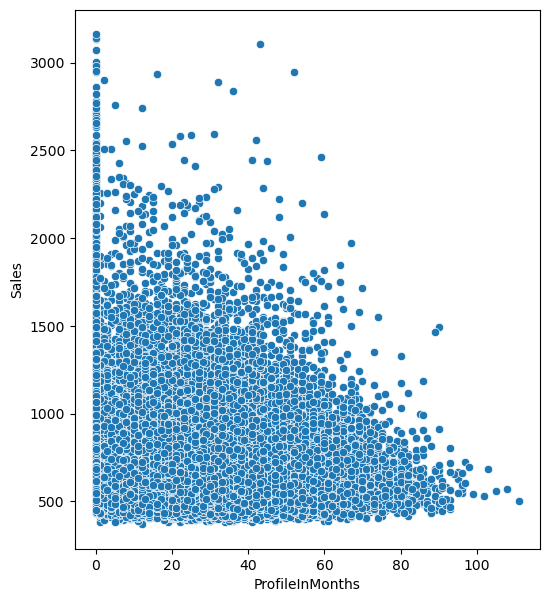

In [11]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(df['ProfileInMonths'], ax = ax_box)
sns.histplot(x = df['ProfileInMonths'], stat = 'density', kde=True, ax=ax_hist)
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.title('Distribution of Profile In Months', y=1.3, fontsize = 13, loc = 'left')

fig, ax = plt.subplots(figsize = (6, 7))
#vs Sales
sns.scatterplot(y = 'Sales', x = 'ProfileInMonths', data = df, ax = ax)

plt.show()

The distribution of ProfileInMonths tells us which customers are loyal aswell as how many new custemers we gained. The plot shows it is slightly skewed right and the peaks are around 0 months and 26 months. The first peak indicates that there are many new profiles. This is a good thing, becuase the company wants more custumers. The problem that the graph indicates is that the new customer won't keep this trend going.

When comparing ProfileInMonths and Sales we can see that sales is the highest when the profile is young. This is concerning becuase this idicates that our older custemers don't buy highly priced products or numerous products. 

The company can be advised on how they can reward loyal customers, in order to have them keep on buying products.

C:\Users\marth\anaconda3\envs\DS241_p39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


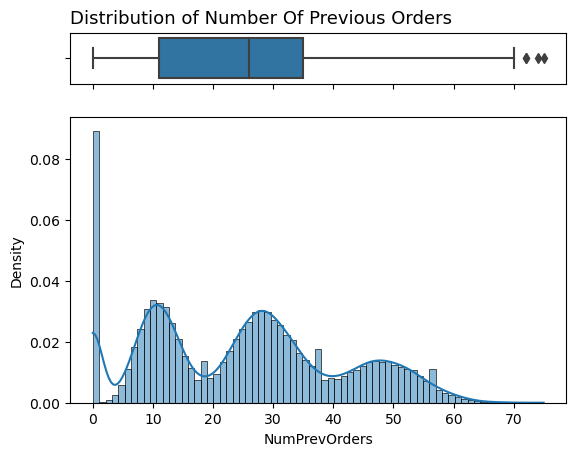

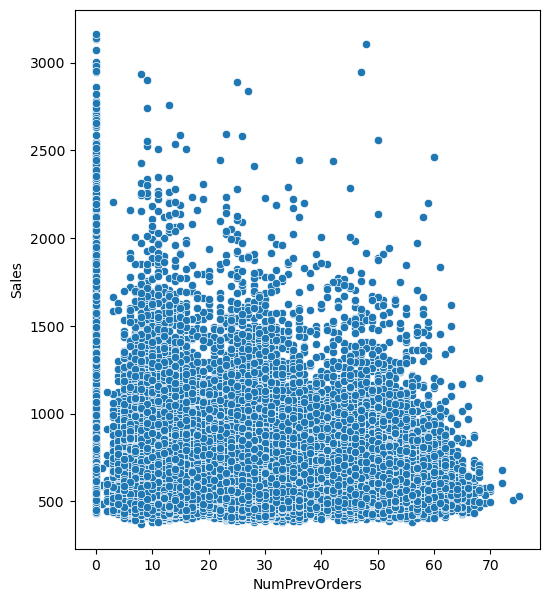

In [12]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(df['NumPrevOrders'], ax = ax_box)
sns.histplot(x = df['NumPrevOrders'], stat = 'density', kde=True, ax=ax_hist)
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

plt.title('Distribution of Number Of Previous Orders', y=1.3, fontsize = 13, loc = 'left')

#move to appendix if give no info:
fig, ax = plt.subplots(figsize = (6, 7))
#vs Sales
sns.scatterplot(y = 'Sales', x = 'NumPrevOrders', data = df, ax = ax)

plt.show()

The distribution of NumPrevOrders is not a known distribution and will be difficult to know how this distribution will look in the future.   
When plot against sales we can't really see a clear relationship between the 2 variables. 
For the knn model this variables will be relevant as knn doesn't check the importance of each feature, but rather its variance.

C:\Users\marth\anaconda3\envs\DS241_p39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


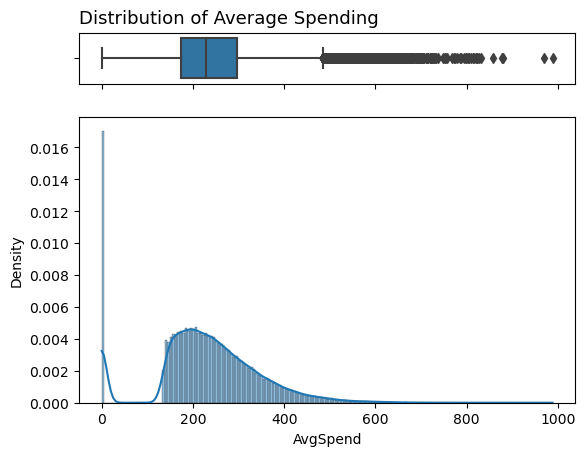

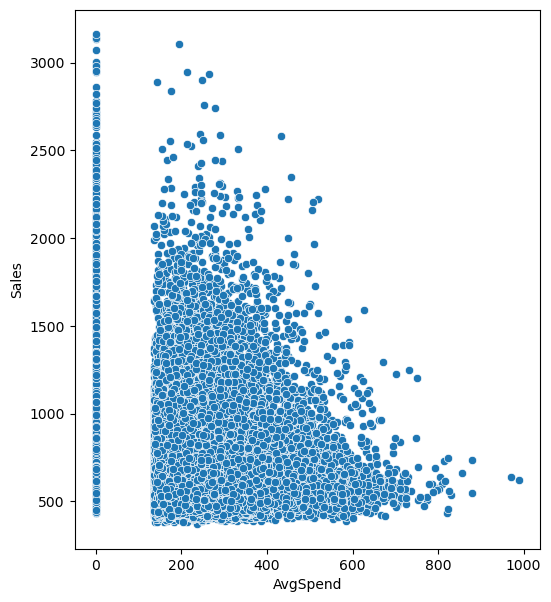

In [13]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(df['AvgSpend'], ax = ax_box)
sns.histplot(x = df['AvgSpend'], stat = 'density', kde=True, ax=ax_hist)
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

plt.title('Distribution of Average Spending', y=1.3, fontsize = 13, loc = 'left')

#move to appendix if give no info:
fig, ax = plt.subplots(figsize = (6, 7))
#vs Sales
sns.scatterplot(y = 'Sales', x = 'AvgSpend', data = df, ax = ax)

plt.show()

AvgSpend is the average amount (in Rands) of all previous orders placed by the customer. Therefore, the distribution of AvgSpend shows the difference between new and old clients.

By looking at Apendix C, code C1, we see that the peak of the distribution and the mean, R232.86, indicates that the AvgSpend is more likely to be a low number.

The split in the graph between old (on the left) and new clients (on the rigyht) will also always be there, as the AvgSpend for new customers is 0 and for old customers will be equal to their last purchase, which cant be less than the least expensive item one can buy.

C:\Users\marth\anaconda3\envs\DS241_p39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


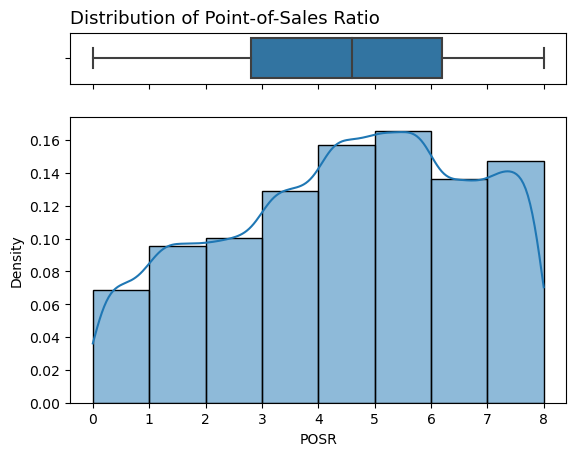

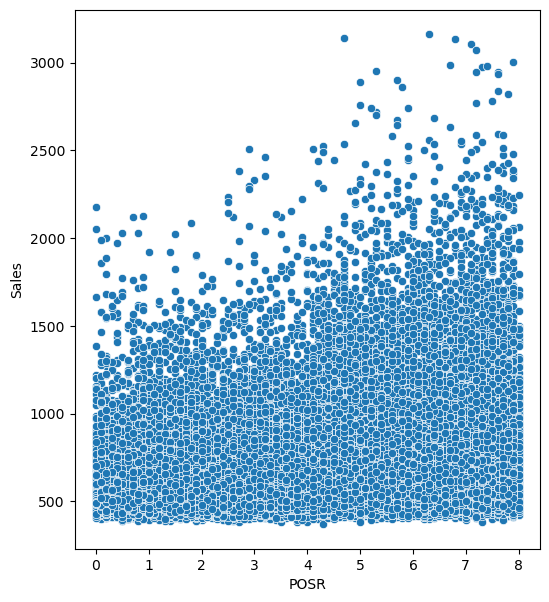

In [14]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(df['POSR'], ax = ax_box)
sns.histplot(x = df['POSR'], stat = 'density', kde=True, ax=ax_hist, bins = 8)
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

plt.title('Distribution of Point-of-Sales Ratio', y=1.3, fontsize = 13, loc = 'left')

#move to appendix if give no info:
fig, ax = plt.subplots(figsize = (6, 7))
#vs Sales
sns.scatterplot(y = 'Sales', x = 'POSR', data = df, ax = ax)

plt.show()

The above graphs show the ditribution of the likeliness of customers responding to advertising.

The boxplot is slightly skewed to the left, which indicates that more than 50% of your customers won't repsond to advertising.

When plotting POSR against sales, it makes sense that Sales increases as POSR increases, as POSR is a ratio of sales.

OPR represents the ratio of the number of times a client makes a purchase to the number of times the
client adds items to a basket. This will not contribute to any findings regarding to predicting Sales as we are only concerned about the amount of a client spends and not whether or not they will make a purchase. Therefore we can remove it from the model.

C:\Users\marth\anaconda3\envs\DS241_p39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


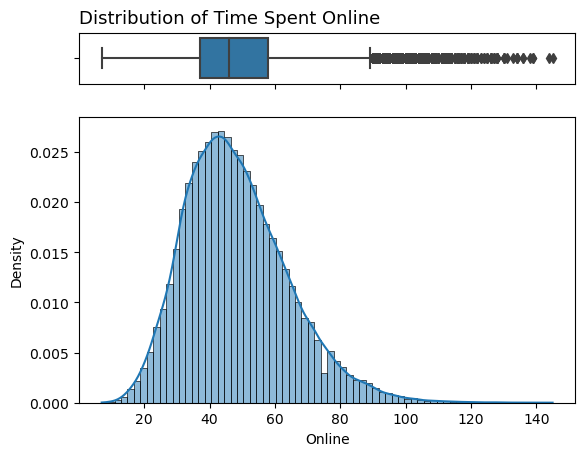

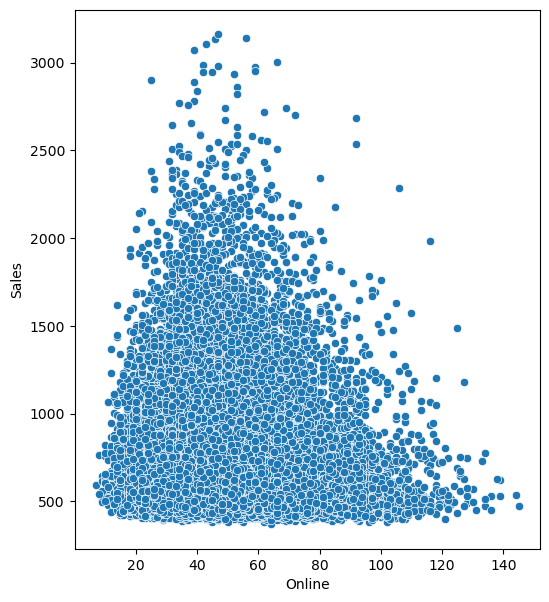

In [15]:
#Online: The time (in minutes)
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(df['Online'], ax = ax_box)
sns.histplot(x = df['Online'], stat = 'density', kde=True, ax=ax_hist, bins = 70)
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

plt.title('Distribution of Time Spent Online', y=1.3, fontsize = 13, loc = 'left')


#move to appendix if give no info:
fig, ax = plt.subplots(figsize = (6, 7))
#vs Sales
sns.scatterplot(y = 'Sales', x = 'Online', data = df, ax = ax)

plt.show()

The time spent online is almost normally distributed, with a mean of 48 minutes. This indicates that most people only spend under an hour on the site.  
When the time a customer spends online is compared to sales we can see sales first increases with time online and then starts to decrease. 

 

The fators to take into acount is how long a person thinks about the amount they are willing to spend as well as whether ot not  the customer has an idea of what they want to buy. The company can be advised to do certain things to increase sales with time spent online. Refer to Set 4 in Appendix B, set for these reasons.

C:\Users\marth\anaconda3\envs\DS241_p39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


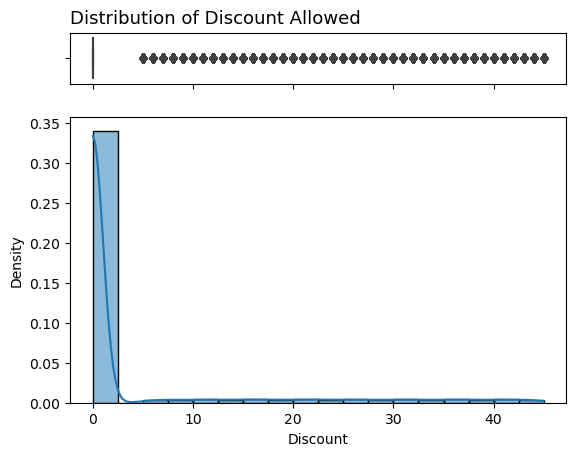

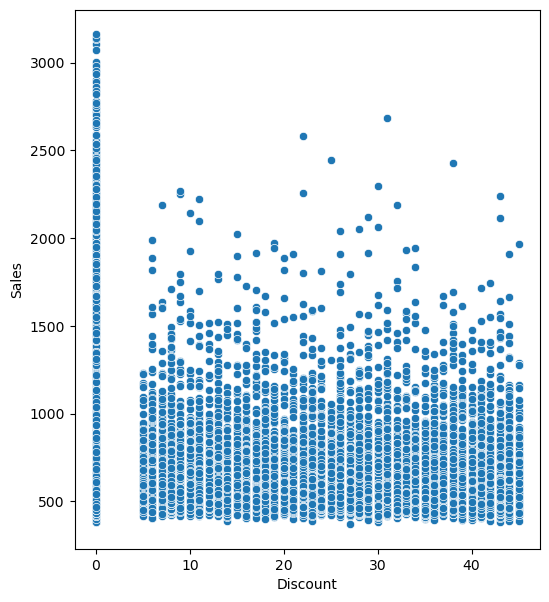

In [16]:
#discount in percentage
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(df['Discount'], ax = ax_box)
sns.histplot(x = df['Discount'], stat = 'density', kde=True, ax=ax_hist)
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

plt.title('Distribution of Discount Allowed', y=1.3, fontsize = 13, loc = 'left')

#move to appendix if give no info:
fig, ax = plt.subplots(figsize = (6, 7))
#vs Sales
sns.scatterplot(y = 'Sales', x = 'Discount', data = df, ax = ax)

plt.show()

Discount's distribution shows that the purchases being made are mostly without discount. We would expect this, because it will not make sense to sell all our products on discount. The discount that's used is evenly spread - showing that a specific discount value doen't perform better than the other.  
When plotted against Sales we can see that the sales of greater value generally don't receive discount. This makes sense as people who are willing to buy the products without discount are willing to spend more and therefore have higher sales. Clients who are maybe not as likely to spend a lot of mine, might wait to receive discount before making purchasing something.

In [17]:
#https://stackoverflow.com/questions/33179122/seaborn-countplot-with-frequencies
def relFreqPlot(var, i, j, order):
    plt.figure(figsize=(i,j))
    ax = sns.countplot(x = var, data = df, order=order)

    # Make twin axis
    ax2=ax.twinx()

    # Switch so count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    # Also switch the labels over
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')

    ax2.set_ylabel('Frequency [%]')

    ncount = len(df[var])
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text

    # Use a LinearLocator to ensure the correct number of ticks
    ax.yaxis.set_major_locator(ticker.LinearLocator(11))

    # frequency range to 0-100
    ax2.set_ylim(0,100)
    ax.set_ylim(0,ncount)

    # count in 10's for freq%
    ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

By looking at Figure A2 (in Appendix A), we can see that the categorical variables don't display much of a relationship with sales. This can be due to the outliers in the data. This will be invesigated further when the model is being designed. 

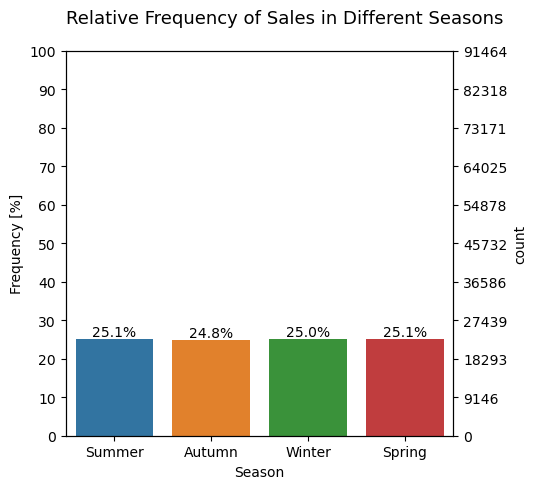

In [18]:
#Seasons
order = ["Summer", "Autumn", "Winter", "Spring"]
relFreqPlot('Season', 5, 5,order)
plt.title('Relative Frequency of Sales in Different Seasons', y=1.05, fontsize = 13, loc = 'left')


plt.show()

The number of sales in each season is evenly spread, they are all around 25%. 

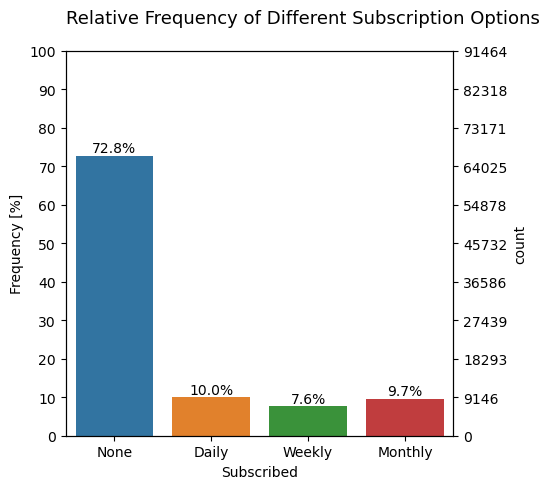

In [19]:
#Subscribed
order = ["None", "Daily", "Weekly", "Monthly"]
relFreqPlot('Subscribed',5, 5,order)
plt.title('Relative Frequency of Different Subscription Options', y=1.05, fontsize = 13, loc = 'left')


plt.show()

72.8% of clients buy when they are not subscribed to any promotional emails. The advice we can give the company is to investige the products they choose to promote over these emails - are the emails personalised or are they general promotions.

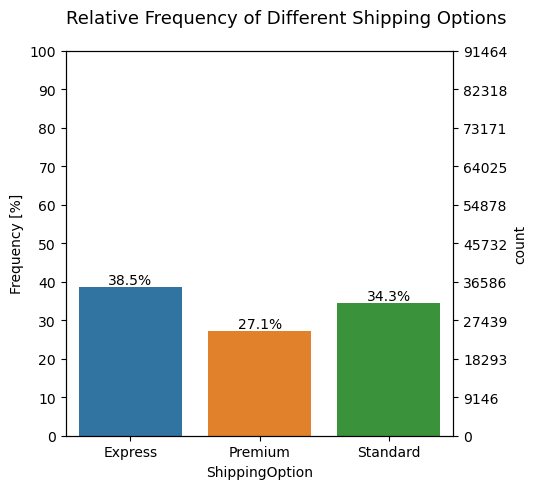

In [20]:
#ShippingOption
order = ["Express","Premium","Standard"]
relFreqPlot('ShippingOption',5, 5, order)
plt.title('Relative Frequency of Different Shipping Options', y=1.05, fontsize = 13, loc = 'left')


plt.show()

The shipping option indicates that standard and express shipping are most popular. This gives us some insight about our clients as we can see whether they're only willing to spend the minimum amount possible or spend some extra money.

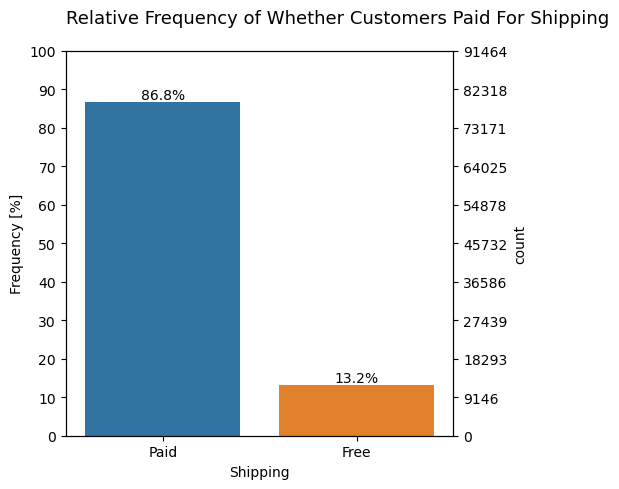

In [21]:
#Shipping
order = ["Paid","Free"]
relFreqPlot('Shipping',5,5, order)
plt.title('Relative Frequency of Whether Customers Paid For Shipping', y=1.05, fontsize = 13, loc = 'left')


plt.show()

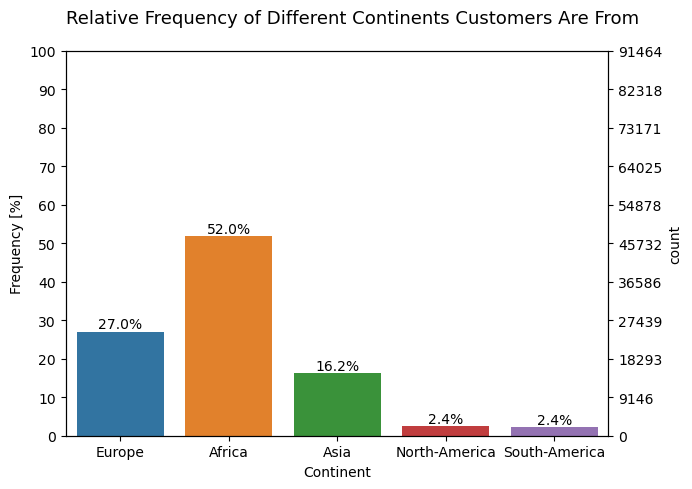

In [22]:
#Continent
order = ["Europe","Africa","Asia","North-America","South-America"]
relFreqPlot('Continent', 7, 5, order)
plt.title('Relative Frequency of Different Continents Customers Are From', y=1.05, fontsize = 13, loc = 'left')


plt.show()

This indicates how the company's decision to expand internationally is doing. We can see South Africa still contains most of our sales, 52%. The follow up is Europe, 27%, and Asia, 16.2%. It looks like decision to expand was good as 48% o=f the company's sales come from abroad, however the company needs to take into account the costs for transport (if clients arent paying the full price) as well as making sure international clients are happy to pay more for the indirect costs (shipping fee or import taxes).

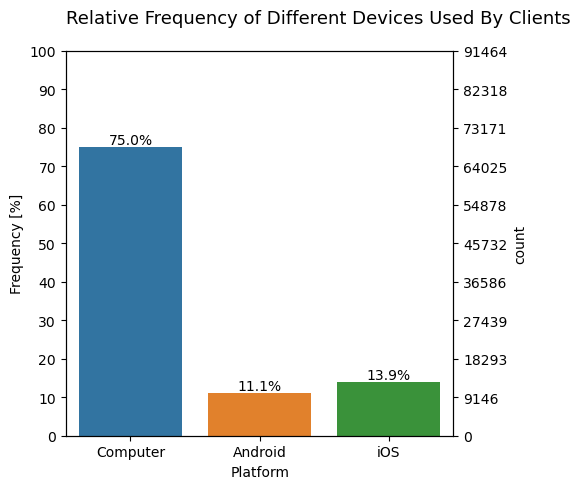

In [23]:
#Platform
order = ["Computer","Android","iOS"]
relFreqPlot('Platform',5,5, order)
plt.title('Relative Frequency of Different Devices Used By Clients', y=1.05, fontsize = 13, loc = 'left')


plt.show()

Most of the companies sales are made on a computer. Customers would prefer to use a bigger screen when viewing the products available.
The number of users making purchases on iOS and android devices are quite similar as both are on moble phones.

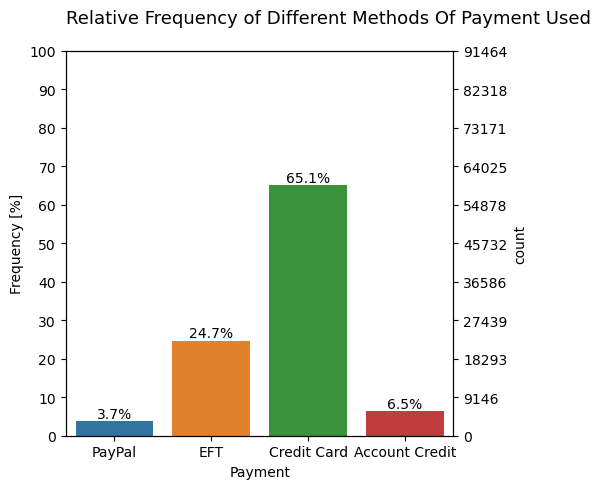

In [24]:
#Payment
order = ["PayPal","EFT","Credit Card","Account Credit"]
relFreqPlot('Payment',5,5,order)
plt.title('Relative Frequency of Different Methods Of Payment Used', y=1.05, fontsize = 13, loc = 'left')


plt.show()

The most popular method of payment is using Credit Card. This is understandable as it is the standard option online, and for the majority of online shoppers, it is their preferred payment option as it is easy and quick to use.
EFT payments are second most popular. It takes slightly more time and effort to do an EFT payment, but it is more secure as your card details aren't shared.
Account Credit is received when a customer returns a good and decides to not be refunded, but rather receive credit to use at a later stage when they place another order. Therefore it makes sense for it to be low as it will be mainly regular customers that will decide to receive credit rather than being refunded.
Paypal is the least used method of payment. It is good for making international paymnets, however the customer needs to ceate and account before being able to use it, which can explain why not many people use it.

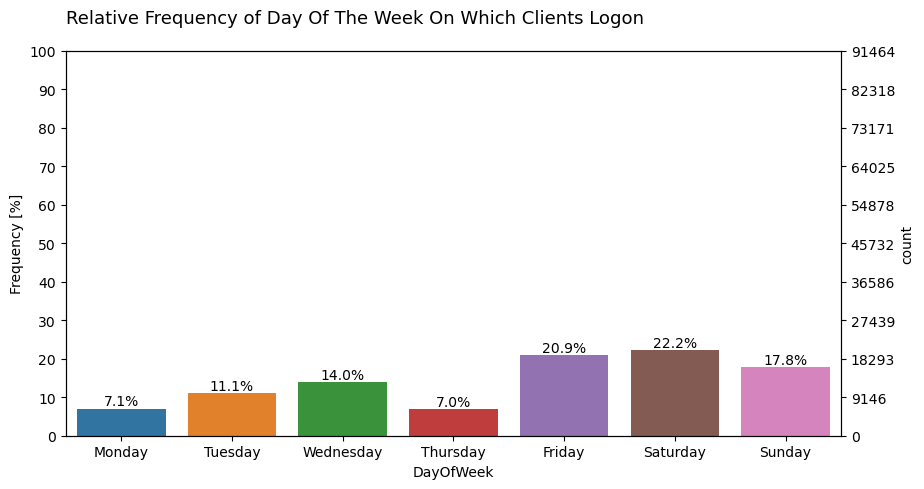

In [25]:
#DayOfWeek
order =["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
relFreqPlot('DayOfWeek',10,5,order)
plt.title('Relative Frequency of Day Of The Week On Which Clients Logon', y=1.05, fontsize = 13, loc = 'left')


plt.show()

This indicates that most people buy more over the weekend (Friday to Sunday). The company can think about how they can increase sales during the week, possibly having discounts on a specific day of the week and possibly only on specific products. This can also give the company the opportunity to get rid of old stock faster.

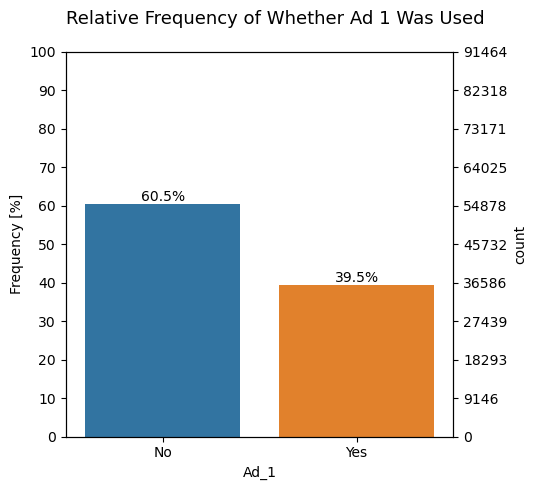

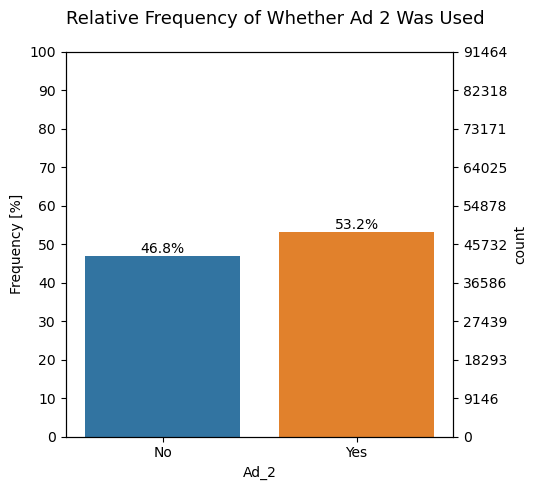

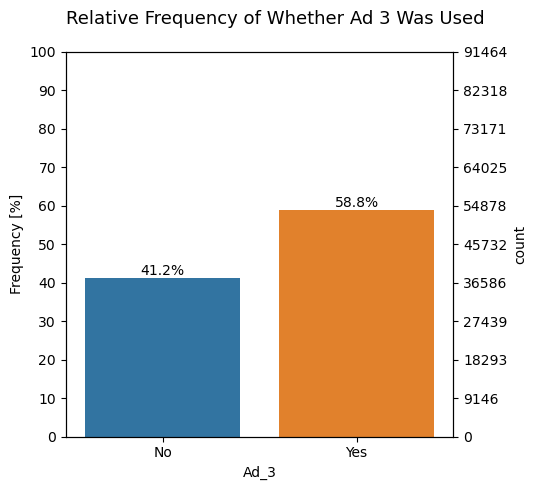

In [26]:
#Ad1
order = ['No', 'Yes']
relFreqPlot('Ad_1',5,5,order)
plt.title('Relative Frequency of Whether Ad 1 Was Used', y=1.05, fontsize = 13, loc = 'left')

relFreqPlot('Ad_2',5,5,order)
plt.title('Relative Frequency of Whether Ad 2 Was Used', y=1.05, fontsize = 13, loc = 'left')

relFreqPlot('Ad_3',5,5,order)
plt.title('Relative Frequency of Whether Ad 3 Was Used', y=1.05, fontsize = 13, loc = 'left')




plt.show()

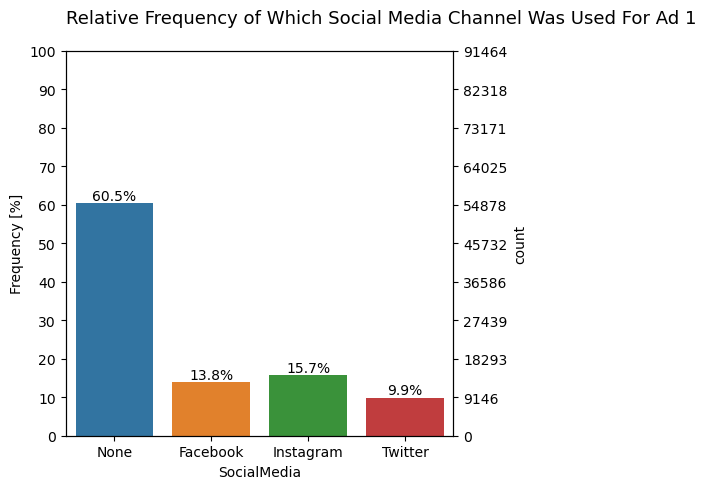

In [27]:
#SocialMedia
order = ['None', 'Facebook', 'Instagram', 'Twitter']
relFreqPlot('SocialMedia',5,5,order)
plt.title('Relative Frequency of Which Social Media Channel Was Used For Ad 1', y=1.05, fontsize = 13, loc = 'left')


plt.show()

We split the data into training and test sets using 80/20 split. Fo datasets that have considerably high number of observations (around 100 000), the best advised split is a 80/20 split. 
Your trainnig data is the set of data you will use to train the model to find the hidden patterns.
The testing data is then a seperate data set that will test how well your mmodel is performing.

 

https://www.baeldung.com/cs/train-test-datasets-ratio

# Regression

The variables we chosen to keep for our first model is based on the correlation.

In [29]:
import statsmodels.formula.api as smf
#lin multi regression model with all variables chosen from correlation
#create the predictors vector
#seperate the target and the variables
X = df_reg.drop(['SocialMedia','ShippingOption','Platform','Ad_1', 'Ad_2', 'Ad_3','ProfileInMonths','Sales', 'Shipping'], axis=1) #--remove 'OPR' -- ???
y = df_reg['Sales']
#split into training and test set 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)
mdl1 = smf.ols('y~X', data=df_reg).fit()

names = list(X.columns.values)
names.insert(0, 'intercept')

print(mdl1.summary(xname = names))


#--- this is the NB model
#remember -- higher F-stat the better


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     870.7
Date:                Sun, 16 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:33:43   Log-Likelihood:            -6.1336e+05
No. Observations:               91464   AIC:                         1.227e+06
Df Residuals:                   91437   BIC:                         1.227e+06
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
intercept                 

### Findings:  
The F statistic is fairly low for the number of variables we are dealing with.
The p-values indicate that the following variables have a significant effect on sales: 
AgeInMonths, NumPrevOrders, AvgSpend, POSR, OPR, Online, Discount, Subscribed.
However there seems to be colinearity between some of the predictors.

In [30]:
y_pred = mdl1.predict(X)
residuals = y - y_pred

Text(0.5, 1.0, 'Residuals vs Fitted')

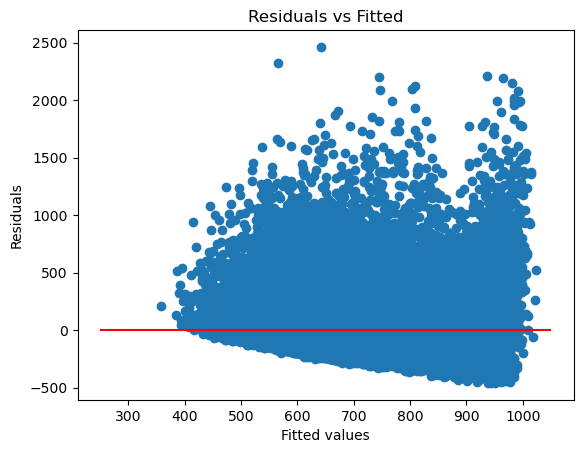

In [31]:
#residuals vs fitted  -- explain to do
fig, ax= plt.subplots()
ax.scatter(y_pred, residuals)
ax.hlines(y = 0, xmin =250, xmax = 1050, color = 'r')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')

Text(0.5, 1.0, 'Relationship Between Fitted Values and Predicted Values')

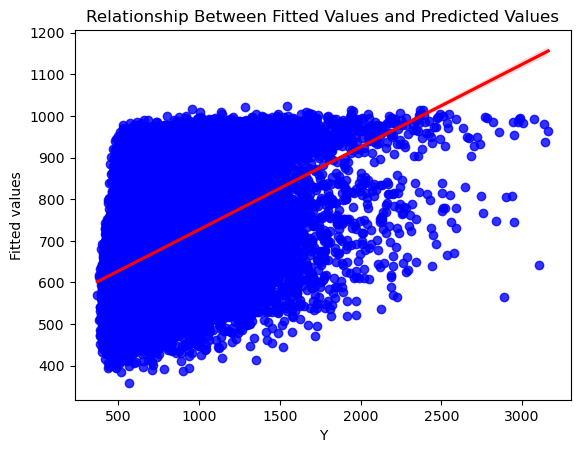

In [32]:
#predicted vs response
sns.regplot(x = y, y = y_pred, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel('Y')
plt.ylabel('Fitted values')
plt.title('Relationship Between Fitted Values and Predicted Values')

### Findings: 
Both graphs indicate non-linearity.

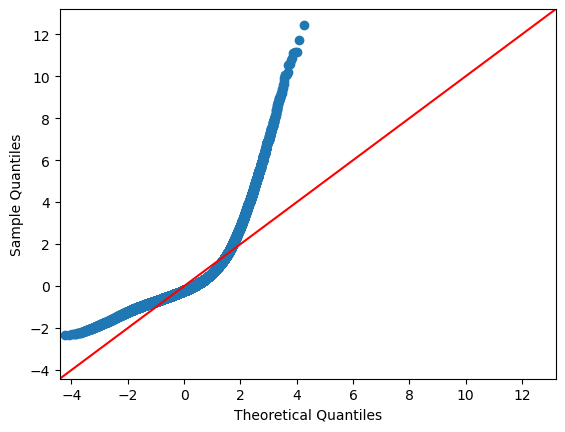

In [33]:
#QQplot --explain to do 
from statsmodels.api import qqplot
qqplot(data = mdl1.resid, fit = True, line = "45")
plt.show()

### Findings: 
The graph above indicates that the residuals don't follow a normal distridution.

Text(0.5, 1.0, 'Relationship Between Fitted Values and Sqrt Standadized Residuals')

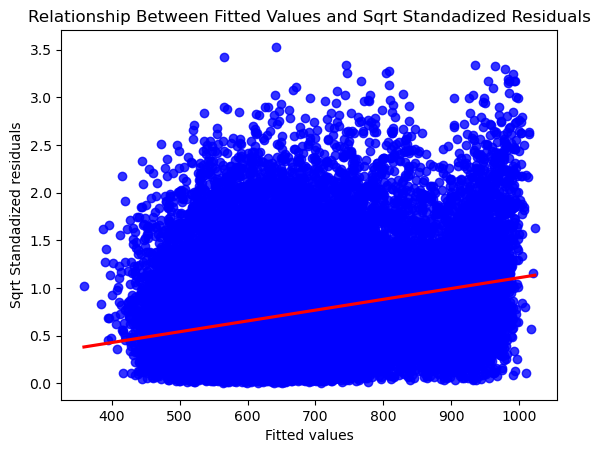

In [34]:
#Scale-location plot -- to do change color of line 
mdl_norm_res = mdl1.get_influence().resid_studentized_internal
mdl_norm_res_obv_sqrt = np.sqrt(np.abs(mdl_norm_res))
sns.regplot(x = mdl1.fittedvalues, y = mdl_norm_res_obv_sqrt, ci = None, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.xlabel('Fitted values')
plt.ylabel('Sqrt Standadized residuals')
plt.title('Relationship Between Fitted Values and Sqrt Standadized Residuals')

## Findings:  
This graph shows that the residuals get bigger, which indicates that the model is not a good fit. 

### Outliers

We chose to remove the outliers in sales to see if this will improve the model's performance. The method used is based on the interquartile range method.

In [35]:
#remove outlier of sales
def removeOutliers(var, data): 
    for x in [var]:
        q75,q25 = np.percentile(data.loc[:,x],[75,25])
        intr_qr = q75-q25
 
        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)
 
        data.loc[data[x] < min,x] = np.nan
        data.loc[data[x] > max,x] = np.nan

C:\Users\marth\anaconda3\envs\DS241_p39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


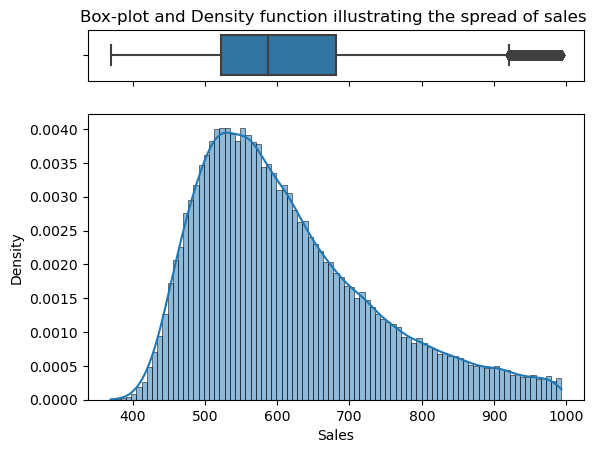

count    85329.00
mean       613.95
std        122.49
min        369.68
25%        522.07
50%        587.11
75%        681.21
max        993.09
Name: Sales, dtype: float64


In [36]:
#remove outlier of sales
df_outliers_sales = df_reg.copy()
removeOutliers('Sales', df_outliers_sales)
data = df.dropna(axis = 0)

fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df_outliers_sales['Sales'], ax = ax_box).set(title='Box-plot and Density function illustrating the spread of sales ')
sns.histplot(x = df_outliers_sales['Sales'], stat = 'density', kde=True, ax=ax_hist)
# Remove x axis name for the boxplot
ax_box.set(xlabel = '')
plt.show()

print(round(df_outliers_sales['Sales'].describe(),2))

In [37]:
#lin multi regression model with previous variables chosen without sales outliers 
#split without the outliers 
X = df_outliers_sales.drop(['SocialMedia','ShippingOption','Platform','Ad_1', 'Ad_2', 'Ad_3','ProfileInMonths','Sales','Shipping'], axis=1)
y = df_outliers_sales['Sales']

mdl_out = smf.ols('y~X', data=df_outliers_sales).fit()

names = list(X.columns.values)
names.insert(0, 'intercept')

print(mdl_out.summary(xname = names))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     620.0
Date:                Sun, 16 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:33:52   Log-Likelihood:            -5.2396e+05
No. Observations:               85329   AIC:                         1.048e+06
Df Residuals:                   85302   BIC:                         1.048e+06
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
intercept                 

### Findings:  
The F statistic (620) in this model is lower than that of the previous model (870,7).
The R squared value also decreased in this model (0,159) compared to (0,198) in the previous model.

Thus, removing the outliers in sales did not improve our model so we rather work with our previous model and make improvements on it.

https://online.stat.psu.edu/stat462/node/180/
for below explain 
VIF
#NB --- this Detecting Multicollinearity!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!-- which we didnt test in the begining
#delete -- reason too many outliers are now build new model to see if perform beter with new model 
#?????????dont know -- still need to look up on 
#this is an example!

## Variable Selection Part 2 For Regression

For the next model we are going to create, we are only going to use the significant variables from the first model.

In [38]:
#perform lin. multi. regression on chosen variables:
#seperate the new variables 
X = df_reg[['Subscribed_Daily','AgeInMonths', 'NumPrevOrders', 'AvgSpend', 'POSR', 'OPR', 'Online', 'Discount', 'Subscribed_Weekly','Subscribed_Monthly']]
y = df_reg['Sales']
#regression model with variables chosen as best describe the sales 
mdl3 = smf.ols('y~X', data=df_new).fit()
names = list(X.columns.values)
names.insert(0, 'intercept')

print(mdl3.summary(xname = names))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     2257.
Date:                Sun, 16 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:33:52   Log-Likelihood:            -6.1339e+05
No. Observations:               91464   AIC:                         1.227e+06
Df Residuals:                   91453   BIC:                         1.227e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercept            571.9971      6

#### Model Fit

In [39]:
y_pred = mdl3.predict(X)
residuals = y - y_pred

Text(0.5, 1.0, 'Residuals vs Fitted')

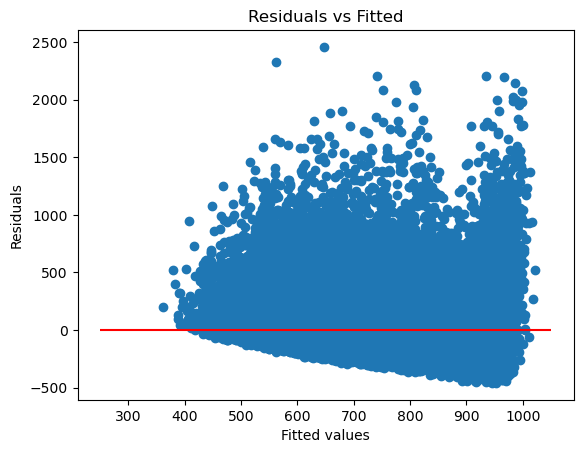

In [40]:
#residuals vs fitted  -- explain to do
fig, ax= plt.subplots()
ax.scatter(y_pred, residuals)
ax.hlines(y = 0, xmin =250, xmax = 1050, color = 'r')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')

Text(0.5, 1.0, 'Relationship Between Fitted Values and Predicted Values')

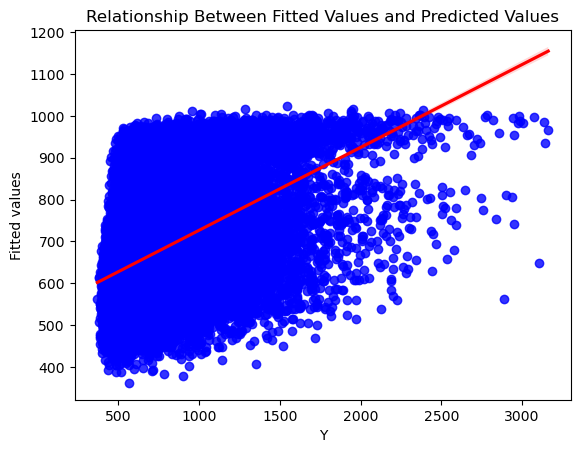

In [41]:
#predicted vs response
sns.regplot(x = y, y = y_pred, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel('Y')
plt.ylabel('Fitted values')
plt.title('Relationship Between Fitted Values and Predicted Values')

### Findings: 
Both graphs indicate non-linearity.

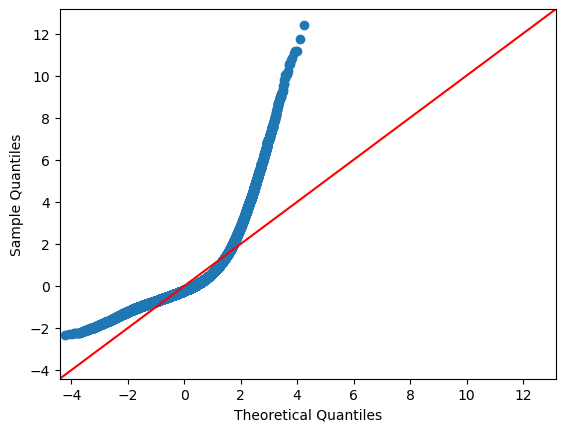

In [42]:
#QQplot
qqplot(data = mdl3.resid, fit = True, line = "45")
plt.show()

### Findings: 
The graph above indicates that the residuals don't follow a normal distridution.

Text(0.5, 1.0, 'Relationship Between Fitted Values and Sqrt Standadized Residuals')

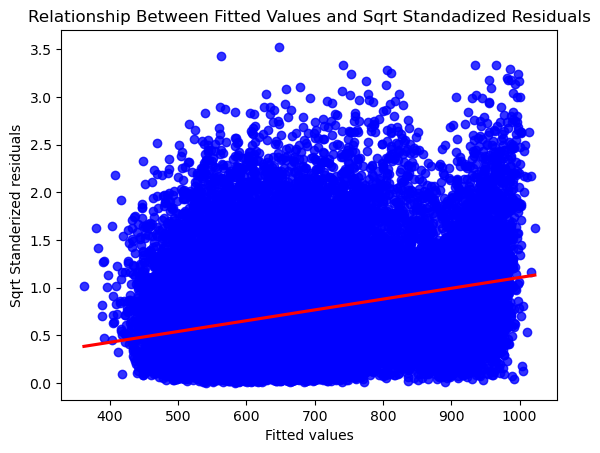

In [43]:
#Scale-location plot -- to do change color of line 
mdl_norm_res = mdl3.get_influence().resid_studentized_internal
mdl_norm_res_obv_sqrt = np.sqrt(np.abs(mdl_norm_res))
sns.regplot(x = mdl3.fittedvalues, y = mdl_norm_res_obv_sqrt, ci = None, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.xlabel('Fitted values')
plt.ylabel('Sqrt Standerized residuals')
plt.title('Relationship Between Fitted Values and Sqrt Standadized Residuals')

## Findings:  
This graph shows that the residuals get bigger, which indicates that the model is not a good fit. 

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

#variance inflation factor
df_cons = add_constant(df_reg)
X = df_cons[['Subscribed_Daily','AgeInMonths', 'NumPrevOrders', 'AvgSpend', 'POSR', 'OPR', 'Online', 'Discount', 'Subscribed_Weekly', 'Subscribed_Weekly','Subscribed_Monthly']] 

vif_data = pd.DataFrame()
vif_data["VIF"] = [variance_inflation_factor(X.values,i)
                            for i in range(len(X.columns))]
print(vif_data)

          VIF
0    1.333572
1   14.972157
2    4.691378
3    7.541786
4    5.675936
5   11.595165
6    9.274280
7    1.142116
8         inf
9         inf
10   1.162525


C:\Users\marth\anaconda3\envs\DS241_p39\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Most of the predictors have a large VIF. The variables already chosen are the significant variables, therefore this indicated that there is still multicolinearity in the model. The significant variables only have an accuracy of 0,198. Thus, removing more of the variables will not improve our model. We will not create a multicolinear regression model as it out of our scope of knowledge.

In [48]:
from sklearn.linear_model import LinearRegression
#training and testing set 
X = df_reg[['Subscribed_Daily','AgeInMonths', 'NumPrevOrders', 'AvgSpend', 'POSR', 'OPR', 'Online', 'Discount', 'Subscribed_Weekly','Subscribed_Monthly']].values
y = df_reg['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
reg=LinearRegression()
reg.fit(X_train,y_train)
print("Intercept is: ", reg.intercept_)
#need to print the next neatly 
print("Coeffients are: ", reg.coef_)

y_test_pred = reg.predict(X_test)
print("R^2: {}". format(reg.score(X_test,y_test)))

Intercept is:  574.9835667947495
Coeffients are:  [ 2.10285720e+01  5.23042068e-01 -1.27320474e+00 -6.45041394e-02
  2.00058508e+01 -2.32084890e+02 -7.91041331e-01 -1.16029710e+00
  1.09597893e+01  9.71804674e+00]
R^2: 0.2059757428409269


In [51]:
#The MSE and RMSE 
from sklearn import metrics

#one way of doing it:
mse = metrics.mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error: {}".format(mse))
print("Root mean squared error: {}".format(rmse))

Mean Squared Error: 39151.50355799288
Root mean squared error: 197.86738881885736


In [53]:
from sklearn.model_selection import cross_val_score
#evaluate the model just created:
#with cross-validation
reg = LinearRegression()
cv_results = cross_val_score(reg, X_test, y_test, cv = 3)
print(cv_results)

[0.20827497 0.20832919 0.20036593]


In [54]:
np.mean(cv_results)

0.20565669515561

The accuracy of this model is 20.57% when tested on test data which is better than how it performed on training data.

# Regularized regression
## Ridge



In [55]:
#Ridge 
from sklearn.linear_model import Ridge
#test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
#Make the model
ridge = Ridge(alpha=0.1, normalize=True)
#fit the model
ridge.fit(X_train, y_train)
#predict with the model
ridge_pred = ridge.predict(X_test)
#how did the model perform 
ridge.score(X_test, y_test)

C:\Users\marth\anaconda3\envs\DS241_p39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


0.20404122476932318

The accuracy of the ridge is 20.40% which is worse than the previous model(20.57%). 

In [57]:
#Lasso
from sklearn.linear_model import Lasso
#test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
#creat the lasso model 
lasso = Lasso(alpha=0.1, normalize=True)
#fit the model 
lasso.fit(X_train, y_train)
#predict with the model
lasso_pred = lasso.predict(X_test)
#how did the model perform 
lasso.score(X_test, y_test)

C:\Users\marth\anaconda3\envs\DS241_p39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


0.14914124545536833

The accuracy of the lasso is 14.91% which is worse than both the ridge and linear model(20.57%). 

# Knn model 

from our research the best number of neighbours is the square root of the number of observations of  our training set of size 73171 hence our k-range is from 269 to 271 (we would have did from 1 to 271 but the dataset size restrict how many fits can be perfomed as it takes too long)

https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb#:~:text=The%20optimal%20K%20value%20usually,be%20aware%20of%20the%20outliers.

https://machinelearningmastery.com/k-fold-cross-validation/

In [83]:
#create the categorical dummie variables for the knn model
df_knn = df_reg.copy()
categorical_col_updated = ['ShippingOption','Platform','Ad_1', 'Ad_2', 'Ad_3', 'Shipping','SocialMedia'] 
df_knn = pd.get_dummies(df_reg, columns = categorical_col_updated) 
# drop unnecessary Columns
df_knn = df_knn.drop(columns = ['Ad_1_No', 'Ad_2_No','Ad_3_No', 'Platform_Android',
                                'ShippingOption_Standard', 'SocialMedia_None', 'Shipping_Free']) 

In [86]:
from sklearn.neighbors import KNeighborsRegressor as KNN 
#RadiusNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import GridSearchCV
#create the predictors vector
X = df_knn.drop(['Sales'], axis=1)
y = df_knn['Sales']
#create the steps to scale the data first 
steps=[('scaler', StandardScaler()), ('knn', KNN())]
#craete the pipeline to compare the data to find the best fit 
pipeline = Pipeline(steps)
#create the parameters -- this is the parameter being tested 
#for the best fit for the model
parameters={"knn__n_neighbors": np.arange(269,272)}
#split into training and test set 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)
#knn model
#still to be continued --- This is only a idea 
#use cross validation to get the best parameter for the
#fit of the data/model 
cv = GridSearchCV(pipeline, param_grid = parameters, cv = 3, verbose = 3,n_jobs=-1)
print('test1')
#fit the training data
cv.fit(X_train,y_train)
#predict with the test data
y_pred = cv.predict(X_test)
print('Best parameter: ', cv.best_params_)
#accaracy - R^2
print('R^2: ', cv.score(X_test, y_test))

#the test error: y_pred vs y_test
knn_test_error = np.mean(y_pred != y_test)
print('Test error: ', knn_test_error)

test1
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best parameter:  {'knn__n_neighbors': 269}
R^2:  0.25478989884435843
Test error:  1.0


Based on the value of R^2 about 25.49% proportion of variance in Sales is explained by the KNN  but due to  test error being 1 is the best predictor due to dimensionlity of the data.

### Conclusion
The best model based on accuracy is the linear regression with only significant predictors compared to all the other models as its accuracy is 20.57% on testing data.

The model we obtained using supervised learning can be use to predict the sales. We would advice to look into multicorrelation regression to create a more accurate model.  

# Appendix A
## Figure A1

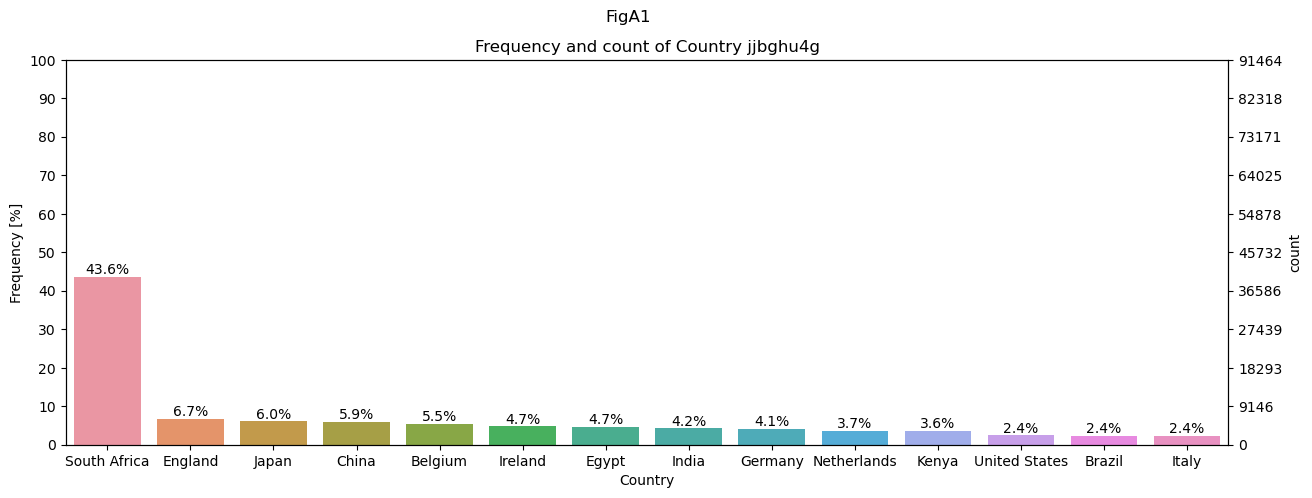

In [39]:
#Country
order = ['South Africa','England','Japan','China','Belgium','Ireland','Egypt','India','Germany','Netherlands','Kenya','United States','Brazil','Italy']
relFreqPlot('Country', 15, 5, order)

plt.title("Frequency and count of Country")
plt.suptitle("FigA1")
plt.xlabel("Country")
plt.show()

FigA1: The plot shows that the frequencies of the countries are all below 7% except South Africa. This gives no new information, because we already know Sales Direct conduct mainly it's business in South Africa. This plot indicate the fact that the company now only started with international customers.

## Fig A2

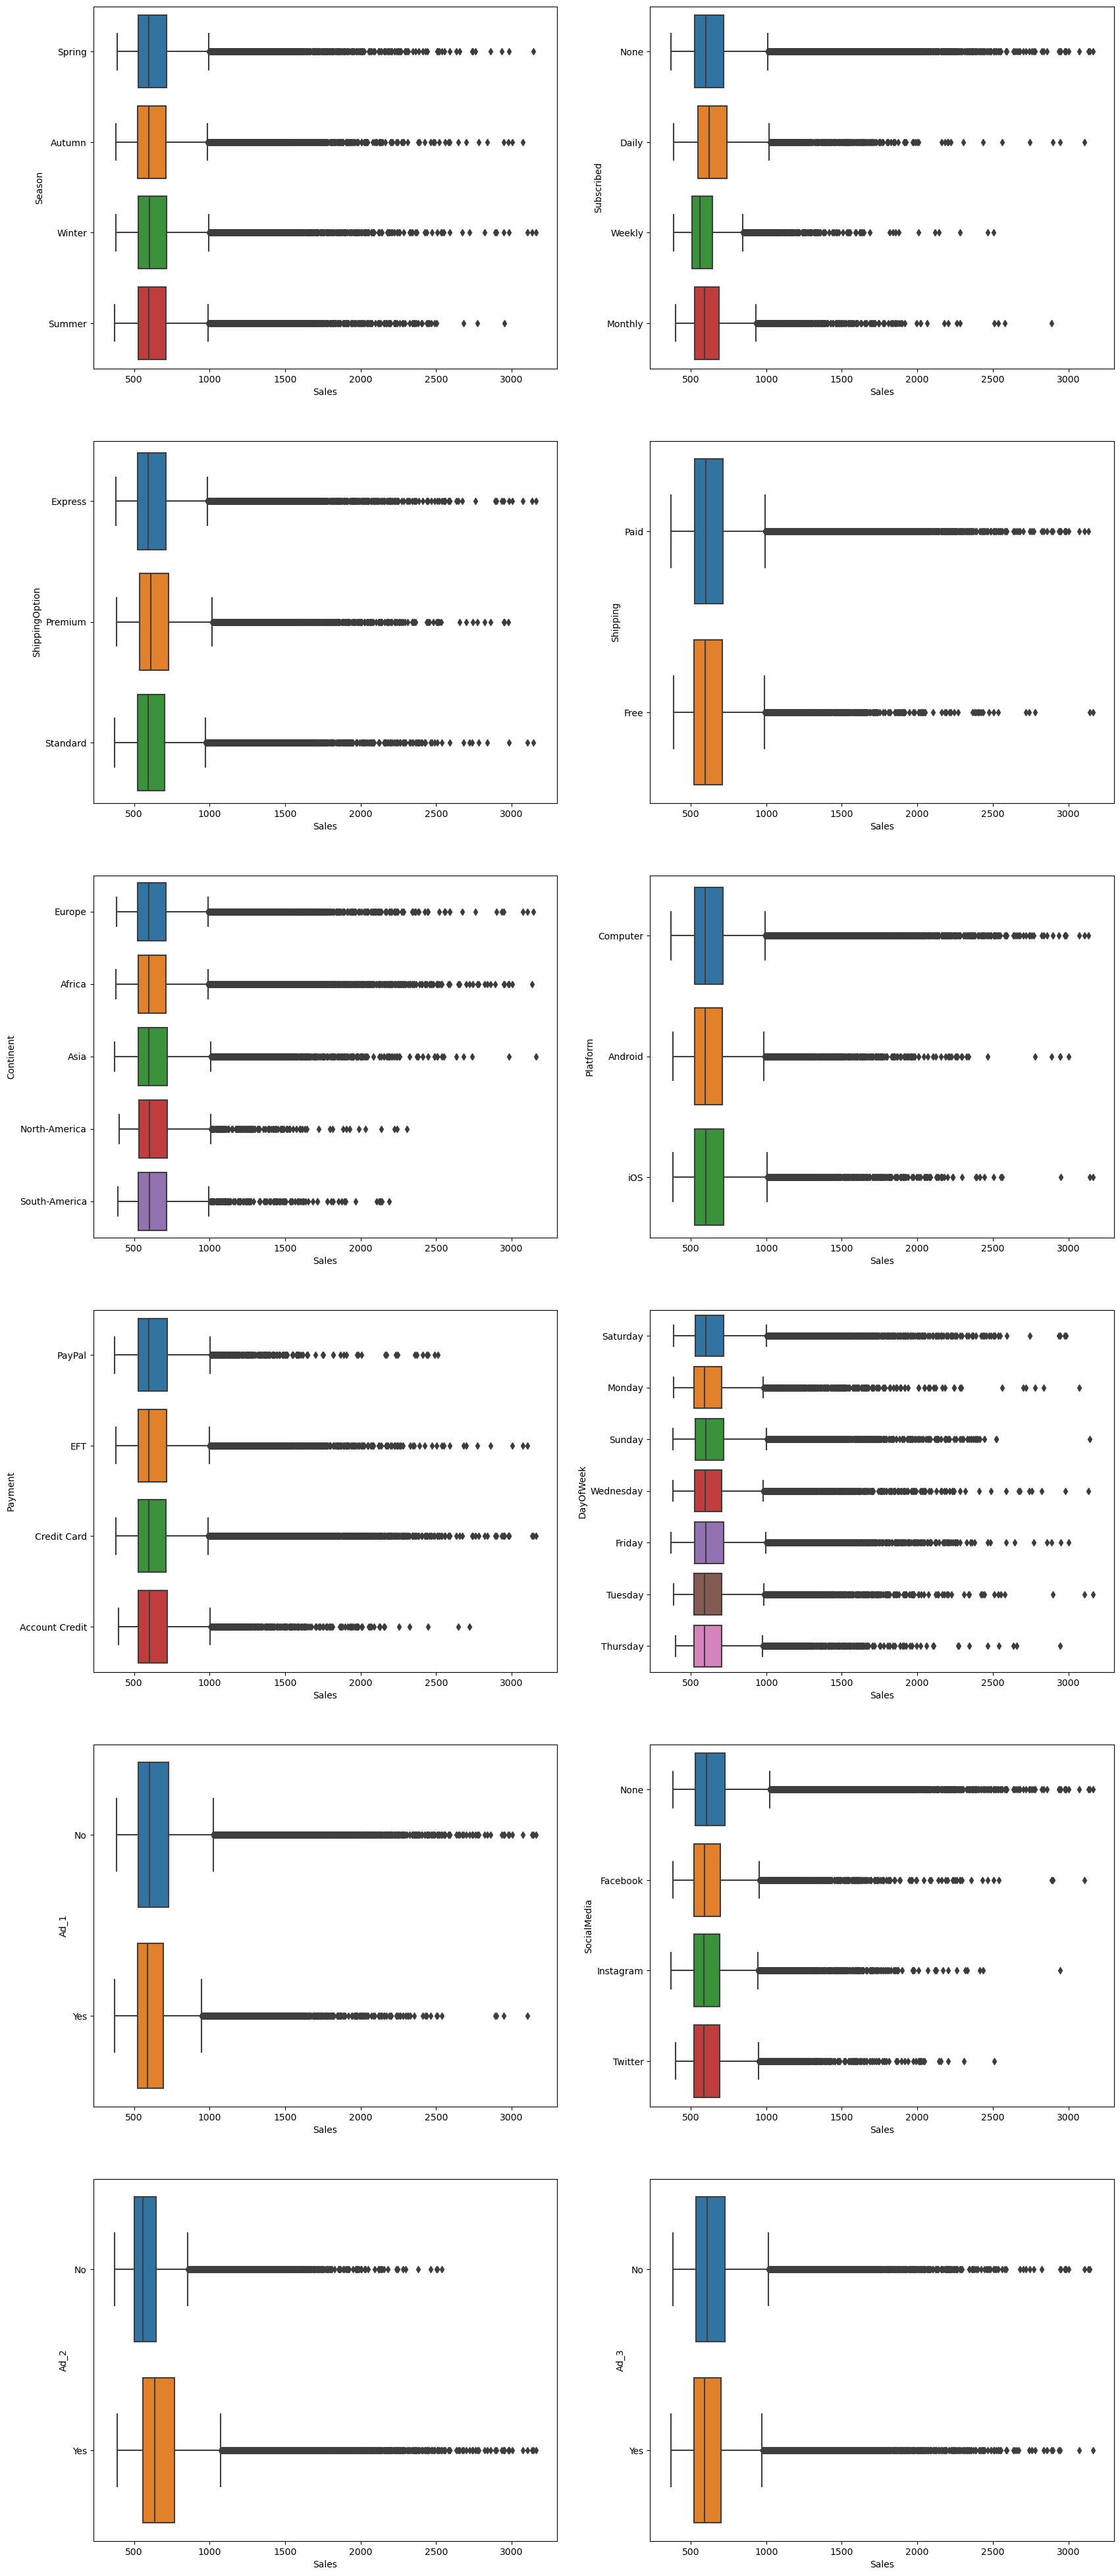

In [18]:
fig, ax = plt.subplots(6,2,figsize = (20, 50))

sns.boxplot(x = 'Sales', y = 'Season', ax=ax[0,0], data = df)
sns.boxplot(x = 'Sales', y = 'Subscribed',ax=ax[0,1], data = df)
sns.boxplot(x = 'Sales', y = 'ShippingOption',ax=ax[1,0], data = df)
sns.boxplot(x = 'Sales', y = 'Shipping',ax=ax[1,1], data = df)
sns.boxplot(x = 'Sales', y = 'Continent', ax=ax[2,0], data = df)
sns.boxplot(x = 'Sales', y = 'Platform',ax=ax[2,1], data = df)
sns.boxplot(x = 'Sales', y = 'Payment',ax=ax[3,0], data = df)
sns.boxplot(x = 'Sales', y = 'DayOfWeek',ax=ax[3,1], data = df)
sns.boxplot(x = 'Sales', y = 'Ad_1',ax = ax[4,0], data = df)
sns.boxplot(x = 'Sales', y = 'SocialMedia',ax=ax[4,1], data = df)
sns.boxplot(x = 'Sales', y = 'Ad_2',ax=ax[5,0], data = df)
sns.boxplot(x = 'Sales', y = 'Ad_3',ax=ax[5,1], data = df)

plt.show()

Fig A2 : All the categorical variables agains the sales. 

# Fig A3

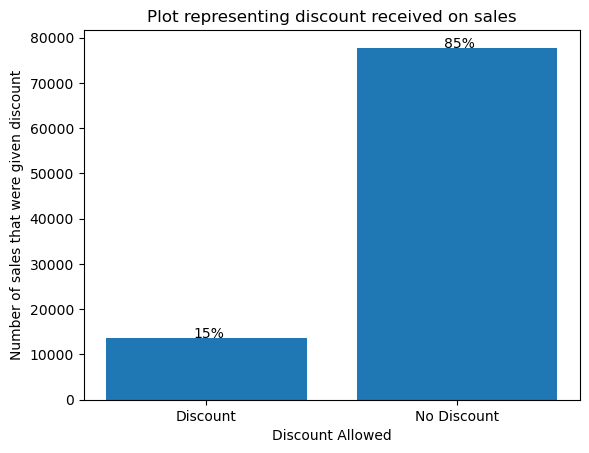

In [61]:
disc = df['Discount'] > 0

count_arr = np.bincount(disc)
false = count_arr[0]
true = count_arr[1]

x = ["Discount", "No Discount",]
y = [true, false]
plt.bar(x, y)

i = 0
for index, value in enumerate(y):
    i = round(value/(false+true)*100)
    plt.text(index - 0.05, value, str(i) + str('%'))

plt.xlabel('Discount Allowed')
plt.ylabel('Number of sales that were given discount')
plt.title('Plot representing discount received on sales')
 
plt.show()

# https://stackoverflow.com/questions/12998430/remove-xticks-in-a-matplotlib-plot
# https://thispointer.com/count-occurrences-of-a-value-in-numpy-array-in-python/#:~:text=in%20the%20array.-,Use%20bincount()%20to%20count%20occurrences%20of%20a%20value%20in,array%20of%20non%2Dnegative%20ints.&text=It%20returned%20the%20count%20of%20all%20occurences%20of%203%20in%20the%20array.

number of people who buy on discount vs no discount 

# Appendix B
## Set1
The change from a binary categorical variable to a numerical variable don't change the number of columns that need to be added to the model. Thus the binary categorical variables can from the start be converted into dummy variables. 

## Set2
The working age population is defined as those aged 15 to 64.
https://data.oecd.org/pop/working-age-population.htm


## Set 3
We know that there exists multicollinearity between the variables, so we aim to get rid of these variables causing this. We start by looking at the variable with the most interactions with other variables, namely Ad_2. We repeat this algorithm until we are only left with one interaction between variables. We then determine which variable is the dependent and the independent one by looking at the variables interaction. Lastly, we remove the dependent variable.

## Set 4
We can advise the company to look into ways to change the site to keep the interest of the customer while they're browsing. 
Products similar to the ones the customer is looking at, should be recommended to keep them active online. If too many products are advertised that they might like, they might lose focus and not buy anything, as it may result in costing too much.
 

The sales decreasing after some time may be a resuolt of the customer seeing more attractive alternatives online. If a customer sees something they like, they are very likely to view other sites to make sure they're making the best decision according to quality and price. The advice we can give is for the business to send a notification to the custemer to remind them about the items in their basket and possibly offer a time-limitted discount. They can also gradually increase the size of the basket icon over time to subtly draw the customers attention to th ebasket which could lead them to more easily adding things to their basket. 
The company will lose nothing by implementing this as it will only lead the customer to spending either the same amount or more.

# Appendix C
## Code C1

In [147]:
round(df.describe(),2)

,Sales,ProfileInMonths,NumPrevOrders,AvgSpend,POSR,OPR,Online,Discount,AgeInYears
count,91464.00,91464.00,91464.00,91464.00,91464.00,91464.00,91464.00,91464.00,91464.00
mean,659.17,26.44,25.10,232.86,4.45,0.65,48.32,3.75,37.14
std,220.91,17.38,16.22,113.72,2.15,0.25,15.87,9.99,5.03
min,369.68,0.00,0.00,0.00,0.00,0.00,7.00,0.00,25.00
25%,526.45,13.00,11.00,172.80,2.80,0.56,37.00,0.00,33.33
50%,597.67,26.00,26.00,228.28,4.60,0.68,46.00,0.00,36.75
75%,713.11,39.00,35.00,297.55,6.20,0.83,58.00,0.00,41.00
max,3161.61,111.00,75.00,988.48,8.00,1.00,145.00,45.00,51.25
